In [2]:
from numpy import cos, sin, pi, absolute, arange
from scipy.signal import kaiserord, lfilter, firwin, freqz
from pylab import figure, clf, plot, xlabel, ylabel, xlim, ylim, title, grid, axes, show



In [31]:
#------------------------------------------------
# Create a signal for demonstration.
#------------------------------------------------

sample_rate = 100.0
nsamples = 300
t = arange(nsamples) / sample_rate

x = cos(2*pi*0.5*t) + 0.2*sin(2*pi*2.5*t+0.1) + \
        0.2*sin(2*pi*15.3*t) + 0.1*sin(2*pi*16.7*t + 0.1) + \
            0.1*sin(2*pi*23.45*t+.8)
        

print x


[ 1.10168563  1.38191166  1.29029608  1.05666263  0.94422545  0.95798688
  1.04630625  1.24103669  1.44362822  1.38745155  1.03788056  0.77561554
  0.91780505  1.25377026  1.34262046  1.11761007  0.88006049  0.80125178
  0.78213891  0.7711632   0.85015107  0.95156431  0.84366613  0.52683779
  0.33441325  0.46087048  0.66083891  0.63158023  0.45030643  0.36905465
  0.38303655  0.32286699  0.23477111  0.30990337  0.48855565  0.49487231
  0.29017088  0.15479253  0.24169921  0.36706079  0.36701158  0.35201891
  0.4227153   0.42250524  0.23092439  0.0692671   0.19940213  0.47231721
  0.51117719  0.26229594  0.03179207  0.00435686  0.06074625  0.09208186
  0.1476988   0.1827861   0.00417554 -0.36016119 -0.54303648 -0.33032288
 -0.03107029 -0.07898129 -0.44459987 -0.7399276  -0.77267023 -0.67610085
 -0.57632652 -0.48423297 -0.50127813 -0.76260067 -1.10297157 -1.12822054
 -0.76851604 -0.45858197 -0.57040277 -0.92540936 -1.1016765  -0.99815193
 -0.81847133 -0.68284651 -0.58417107 -0.60902498 -0

In [70]:
import FixedPoint
import math

pi = math.pi
x = cos(2*pi*0.5*t) + 0.2*sin(2*pi*2.5*t+0.1) + \
        0.2*sin(2*pi*15.3*t) + 0.1*sin(2*pi*16.7*t + 0.1) + \
            0.1*sin(2*pi*23.45*t+.8)
        
family = FixedPoint.FXfamily(32)        
for val in x:  
    val = float(val)
    F32x = FixedPoint.FXnum(val, family)
    print F32x

1.1016856338
1.3819116563
1.2902960763
1.0566626342
0.9442254509
0.9579868819
1.0463062531
1.2410366851
1.4436282175
1.3874515504
1.0378805601
0.7756155442
0.9178050509
1.2537702552
1.3426204626
1.1176100657
0.8800604904
0.8012517776
0.7821389127
0.7711632037
0.8501510692
0.9515643124
0.8436661346
0.5268377901
0.3344132483
0.4608704806
0.6608389115
0.6315802272
0.4503064292
0.3690546541
0.3830365540
0.3228669923
0.2347711143
0.3099033674
0.4885556518
0.4948723060
0.2901708844
0.1547925285
0.2416992078
0.3670607942
0.3670115775
0.3520189109
0.4227152953
0.4225052366
0.2309243921
0.0692671025
0.1994021341
0.4723172129
0.5111771908
0.2622959420
0.0317920700
0.0043568606
0.0607462450
0.0920818618
0.1476988031
0.1827860961
0.0041755409
-0.3601611929
-0.5430364806
-0.3303228814
-0.0310702894
-0.0789812884
-0.4445998708
-0.7399276024
-0.7726702329
-0.6761008540
-0.5763265227
-0.4842329700
-0.5012781261
-0.7626006703
-1.1029715747
-1.1282205444
-0.7685160355
-0.4585819696
-0.5704027675
-0.9254

In [48]:
import FixedPoint
import math
#from gocept.fixedpoint import FixedPoint


#F32x = cos(2*pi*0.5*t) + 0.2*sin(2*pi*2.5*t+0.1) + \
#        0.2*sin(2*pi*15.3*t) + 0.1*sin(2*pi*16.7*t + 0.1) + \
#            0.1*sin(2*pi*23.45*t+.8)

family = FixedPoint.FXfamily(32)
pi = math.pi
#theta1 = 
theta2 = 2*pi*2.5*t+0.1
theta3 = 2*pi*15.3*t
theta4 = 2*pi*23.45*t+.8
#print FixedPoint(2, 8) / 7
F32x = FixedPoint.FXnum((2*pi*0.5*t), family).cos() #+ 0.2 * (FixedPoint.FXnum(theta2, family).sin()) + 0.2 * (FixedPoint.FXnum(theta3, family).sin())+ 0.1 *(FixedPoint.FXnum(theta2, family).sin()) 
print F32x
print family
                                        

#val = 4 * FixedPoint.FXnum(1, FixedPoint.FXfamily(res)).atan()

IndexError: invalid index to scalar variable.

In [10]:
#------------------------------------------------
# Create a FIR filter and apply it to x.
#------------------------------------------------

# The Nyquist rate of the signal.
nyq_rate = sample_rate / 2.0

# The desired width of the transition from pass to stop,
# relative to the Nyquist rate.  We'll design the filter
# with a 5 Hz transition width.
width = 5.0/nyq_rate

# The desired attenuation in the stop band, in dB.
ripple_db = 60.0

# Compute the order and Kaiser parameter for the FIR filter.
N, beta = kaiserord(ripple_db, width)

# The cutoff frequency of the filter.
cutoff_hz = 10.0

# Use firwin with a Kaiser window to create a lowpass FIR filter.
taps = firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))

# Use lfilter to filter x with the FIR filter.
filtered_x = lfilter(taps, 1.0, x)


In [11]:
#------------------------------------------------
# Plot the FIR filter coefficients.
#------------------------------------------------

figure(1)
plot(taps, 'bo-', linewidth=2)
title('Filter Coefficients (%d taps)' % N)
grid(True)


In [12]:
#------------------------------------------------
# Plot the magnitude response of the filter.
#------------------------------------------------

figure(2)
clf()
w, h = freqz(taps, worN=8000)
plot((w/pi)*nyq_rate, absolute(h), linewidth=2)
xlabel('Frequency (Hz)')
ylabel('Gain')
title('Frequency Response')
ylim(-0.05, 1.05)
grid(True)

# Upper inset plot.
ax1 = axes([0.42, 0.6, .45, .25])
plot((w/pi)*nyq_rate, absolute(h), linewidth=2)
xlim(0,8.0)
ylim(0.9985, 1.001)
grid(True)

# Lower inset plot
ax2 = axes([0.42, 0.25, .45, .25])
plot((w/pi)*nyq_rate, absolute(h), linewidth=2)
xlim(12.0, 20.0)
ylim(0.0, 0.0025)
grid(True)

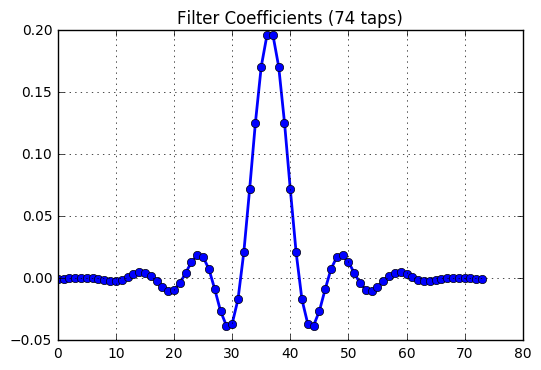

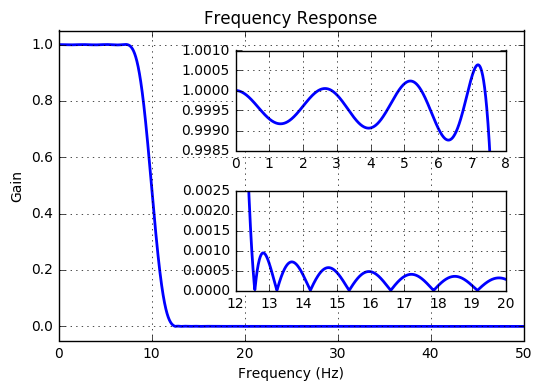

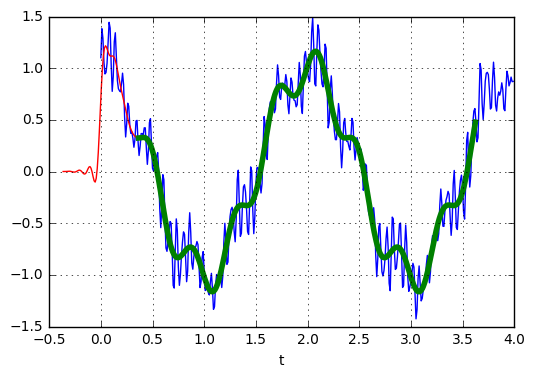

In [6]:
#------------------------------------------------
# Plot the original and filtered signals.
#------------------------------------------------

# The phase delay of the filtered signal.
delay = 0.5 * (N-1) / sample_rate

figure(3)
# Plot the original signal.
plot(t, x)
# Plot the filtered signal, shifted to compensate for the phase delay.
plot(t-delay, filtered_x, 'r-')
# Plot just the "good" part of the filtered signal.  The first N-1
# samples are "corrupted" by the initial conditions.
plot(t[N-1:]-delay, filtered_x[N-1:], 'g', linewidth=4)

xlabel('t')
grid(True)

show()
